In [110]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from uuid import uuid4


# Extends pandas txt accessor
from utils import TextAccessor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
DATASET = Path().cwd().parent/"Datasets"/"Scrapper"
my_colombian = (DATASET/"mycolombianrecipes").glob("*.csv")
my_colombian_df = pd.concat([pd.read_csv(file) for file in my_colombian])

In [15]:
my_colombian_df.date = pd.to_datetime(my_colombian_df.date)
my_colombian_df.ingredients = my_colombian_df.ingredients.str.replace("\n", " ")
my_colombian_df.steps = my_colombian_df.steps.str.replace("\n", " ")

In [16]:
my_colombian_df.head()

,title,date,url,ingredients,steps
0,Arepas de Queso,2023-04-06 14:30:00+00:00,https://www.mycolombianrecipes.com/es/arepas-d...,1 taza de harina de arepa blanca o amarilla 1 ...,"Combine la harina de maíz, agua caliente, el q..."
1,Sudado de Pollo,2023-03-30 12:24:00+00:00,https://www.mycolombianrecipes.com/es/sudado-d...,8 muslos de pollo sin la piel 1 cucharada de a...,"En una olla grande, caliente el aceite vegetal..."
2,Sancocho Trifásico,2023-03-28 12:58:00+00:00,https://www.mycolombianrecipes.com/es/sancocho...,1 taza de cebolla picada 1 pimientón rojo fina...,"Coloque la cebolla, el pimientón, el ajo y el ..."
3,Sudado de Posta o Muchacho,2023-03-23 15:00:00+00:00,https://www.mycolombianrecipes.com/es/sudado-d...,"1 posta o muchacho de 3 a 4 libras, cortada en...","En una olla grande ponga la carne, el caldo, ..."
4,Sopa de Lentejas Colombiana,2023-03-22 12:39:00+00:00,https://www.mycolombianrecipes.com/es/sopa-de-...,1 cucharadita de aceite vegetal 1 taza de chor...,Cocinar el chorizo en el aceite en una olla gr...


In [17]:
my_colombian_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   title        446 non-null    object             
 1   date         446 non-null    datetime64[ns, UTC]
 2   url          446 non-null    object             
 3   ingredients  446 non-null    object             
 4   steps        446 non-null    object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 17.5+ KB


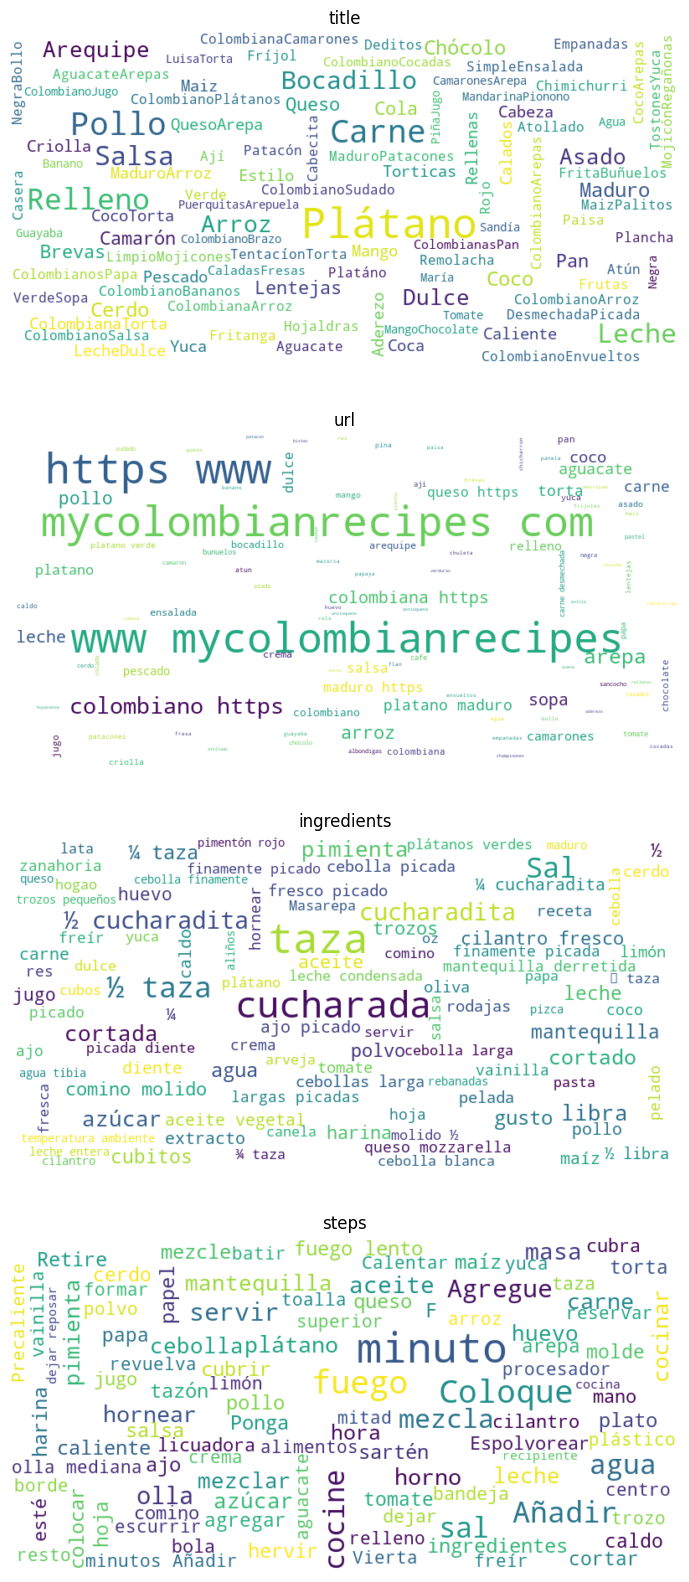

In [18]:
my_colombian_df.utils_text.plot_word_cloud()

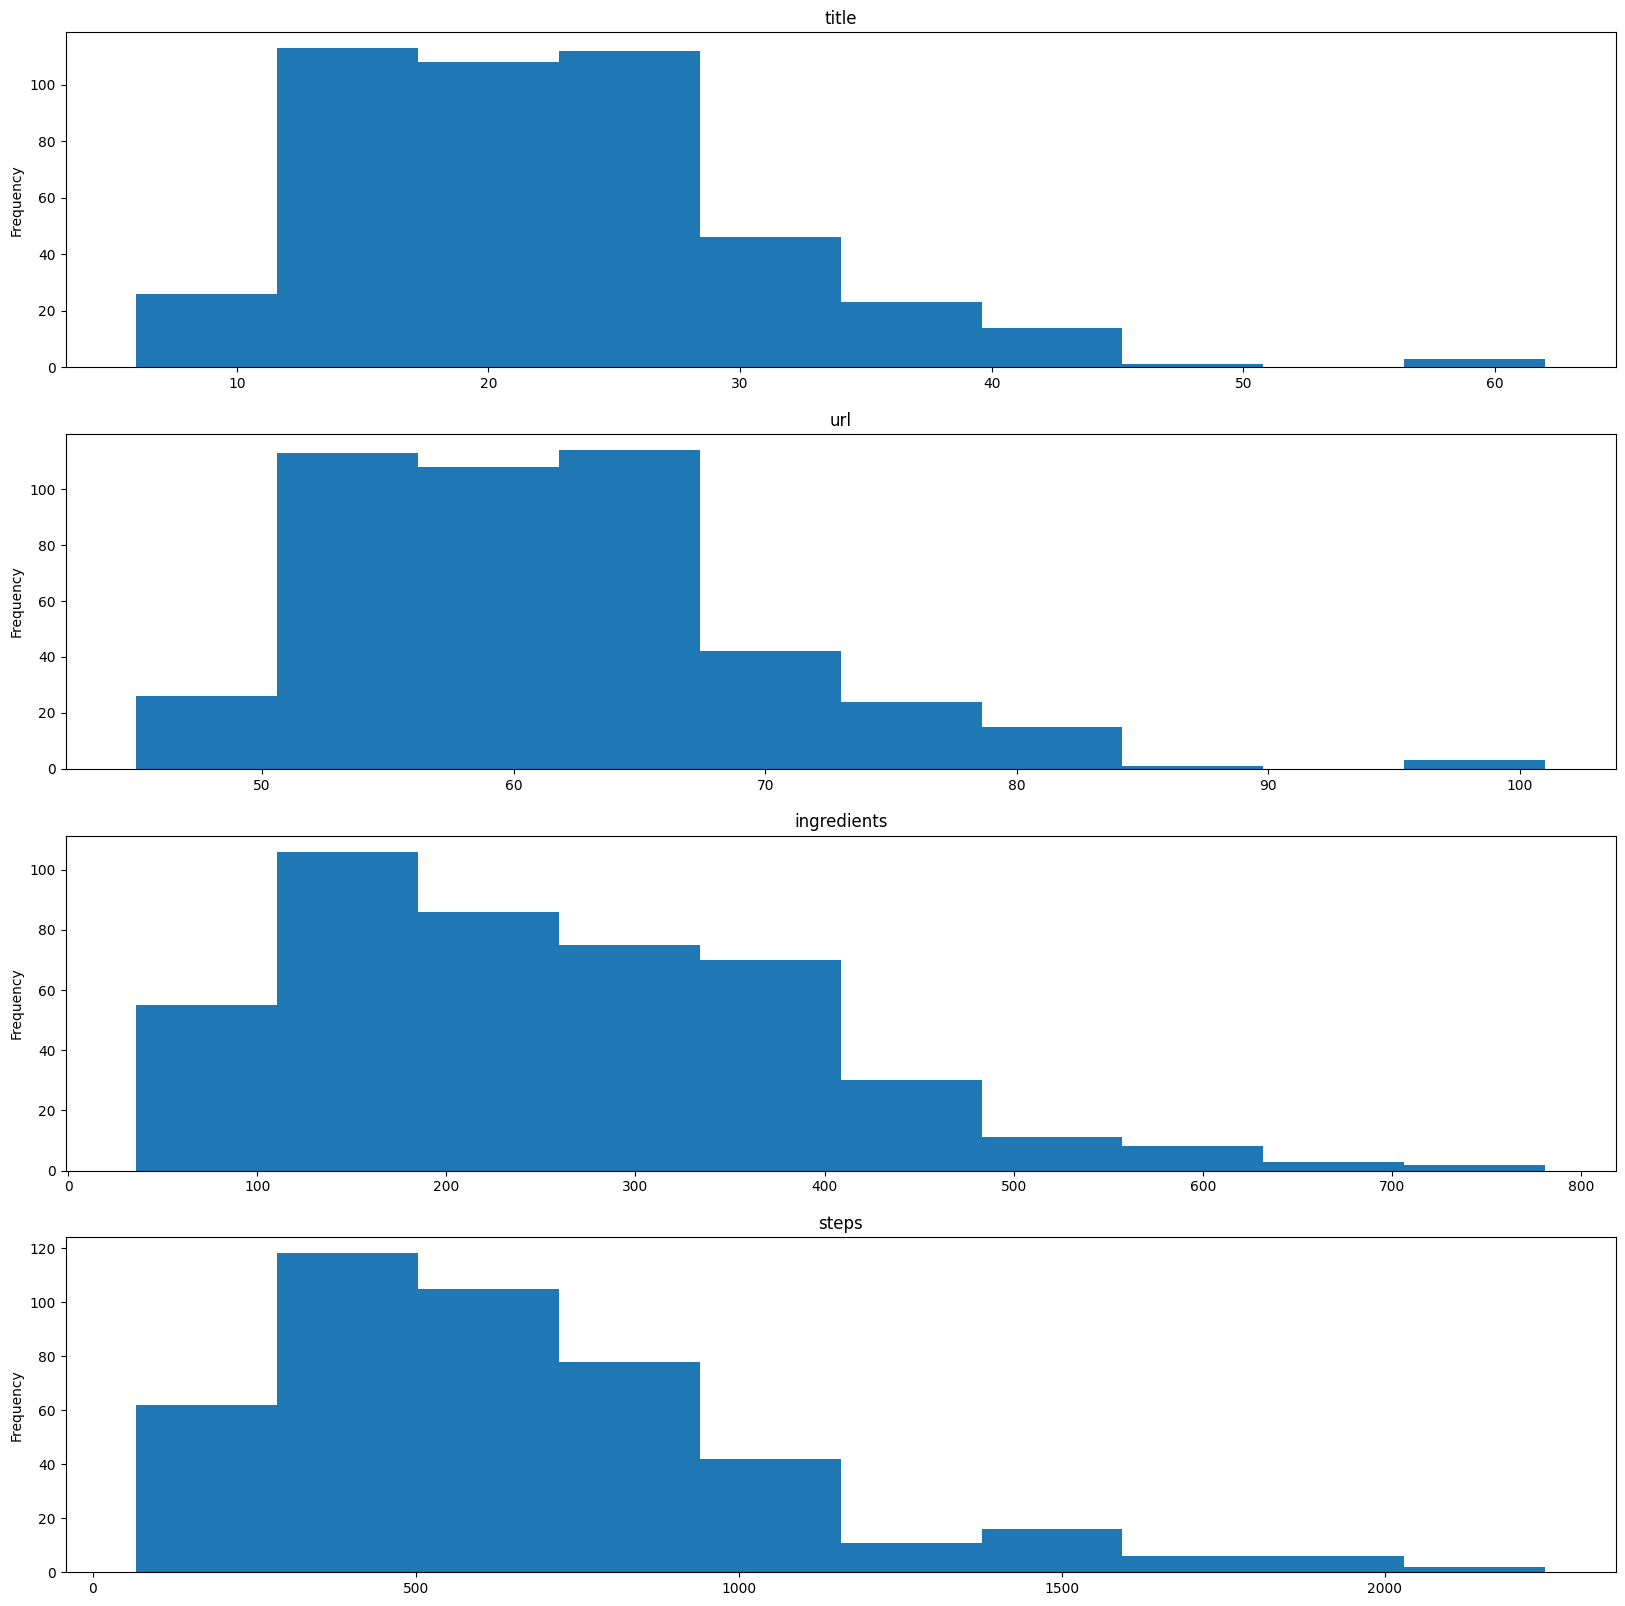

In [19]:
my_colombian_df.utils_text.plot_length_text()

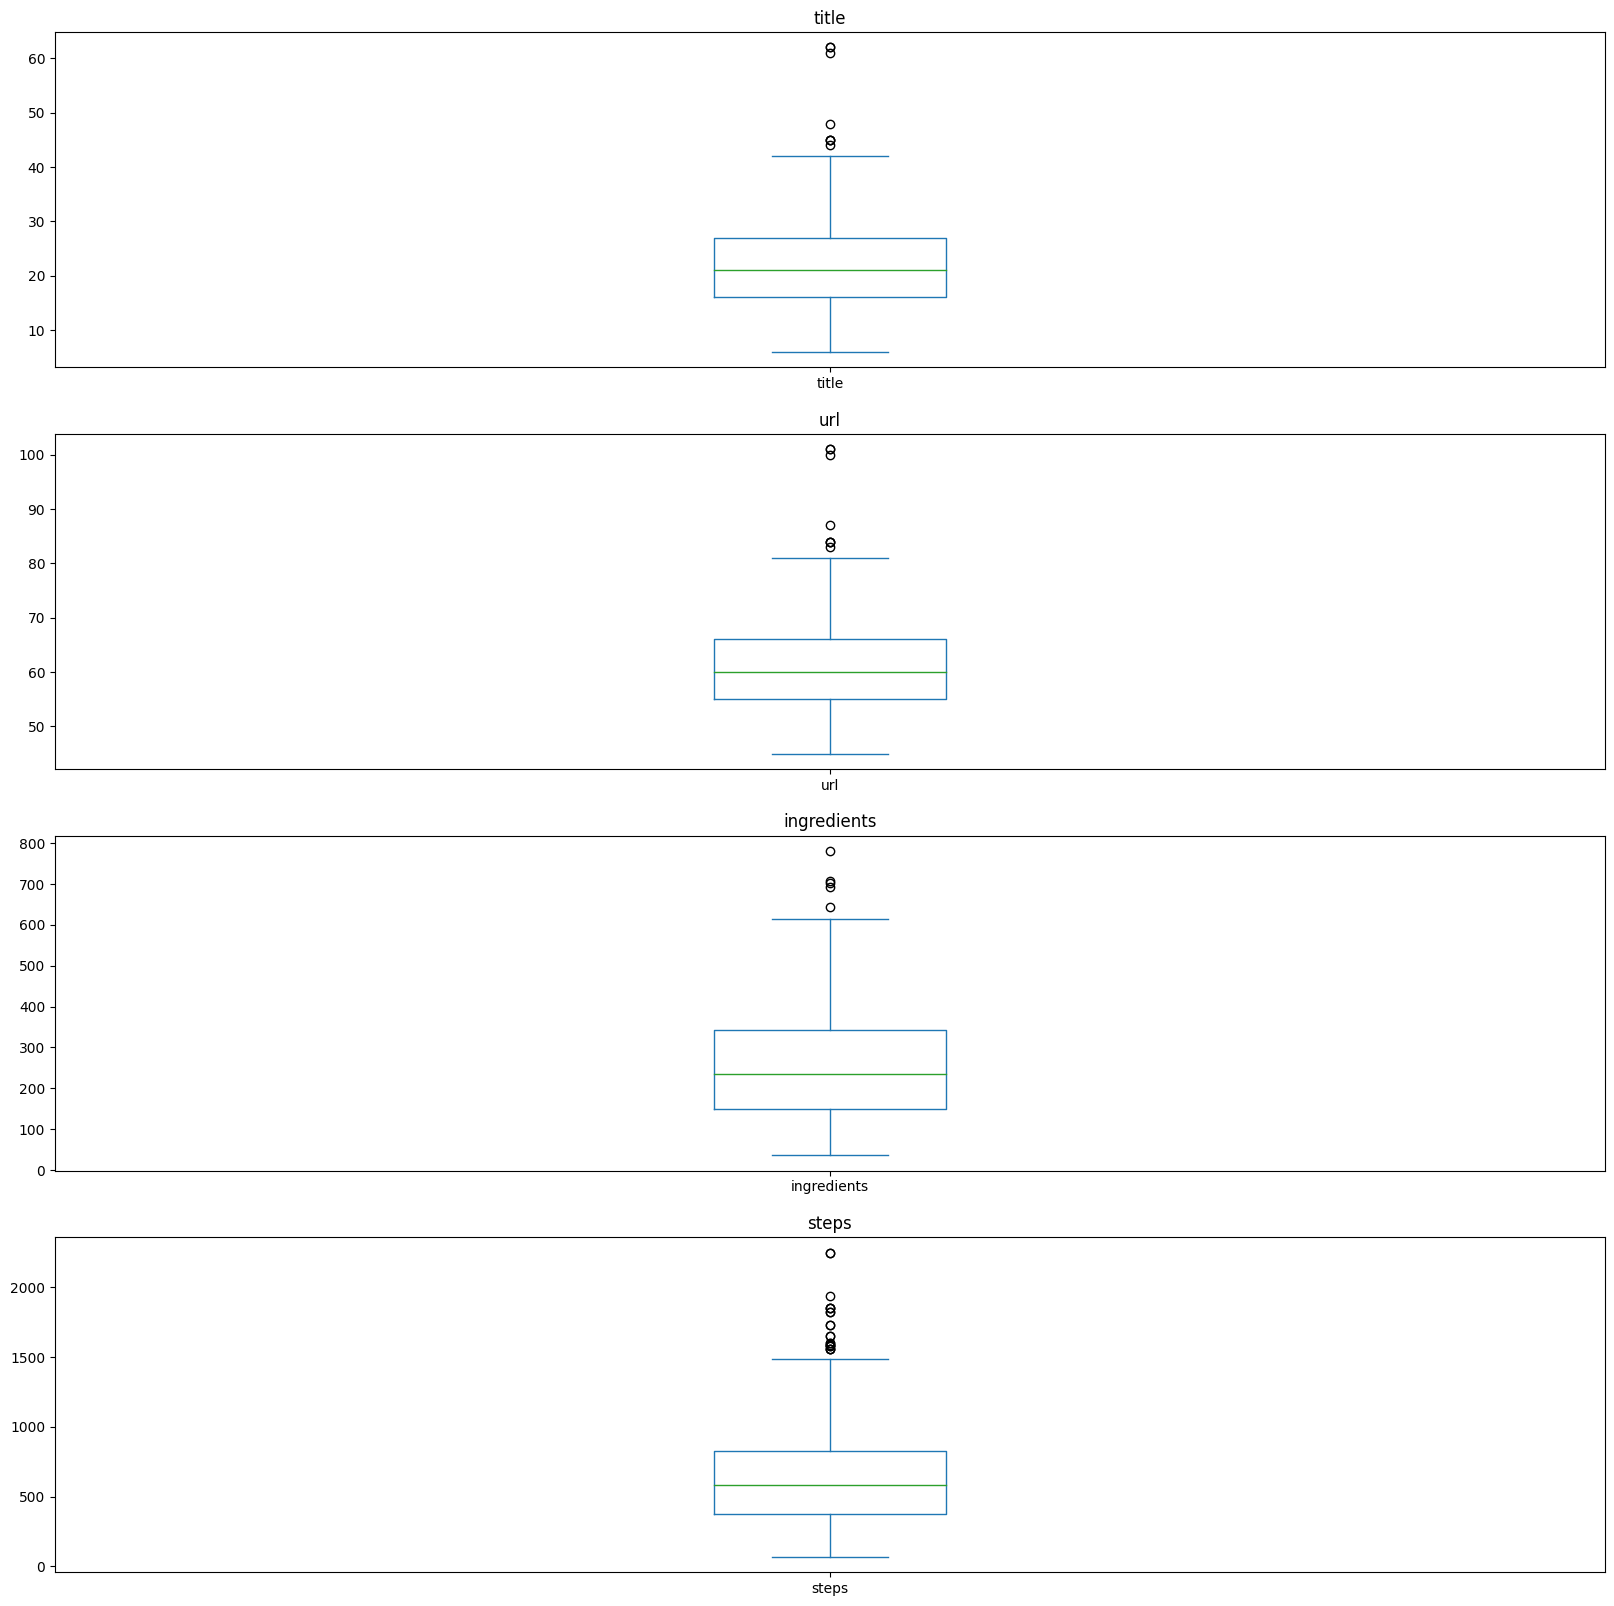

In [20]:
my_colombian_df.utils_text.plot_boxplot()

In [21]:
def create_tamplate(title, ingredients, steps):
    template = f"""nombre del plato: {title}
Dado que los ingredientes son:
{ingredients}
Hacer los siguientes pasos:
{steps}"""
    return template

my_colombian_df["template"] = my_colombian_df.apply(lambda x: create_tamplate(x.title, x.ingredients, x.steps), axis=1)
    

In [22]:
print(my_colombian_df["template"].iloc[0])

nombre del plato: Arepas de Queso
Dado que los ingredientes son:
1 taza de harina de arepa blanca o amarilla 1 taza de agua tibia ⅓ taza de queso mozzarella o queso blanco rallado 2 cucharadas de mantequilla Sal
Hacer los siguientes pasos:
Combine la harina de maíz, agua caliente, el queso, la mantequilla y sal, mezclando bien. Deje que la mezcla repose durante cinco minutos. Amasar con las manos durante unos 3 minutos humedeciendo las manos con agua mientras amasa. Formar 4 bolas con la masa. Coloque cada bola entre 2 bolsas de plástico y con una cubierta olla aplane a ½ de pulgada. Añadir la mantequilla en una sartén antiadherente a fuego medio. Coloque las arepas en la sartén y cocine durante aproximadamente 3 minutos de cada lado, hasta que estén doradas.
    


<Axes: ylabel='Frequency'>

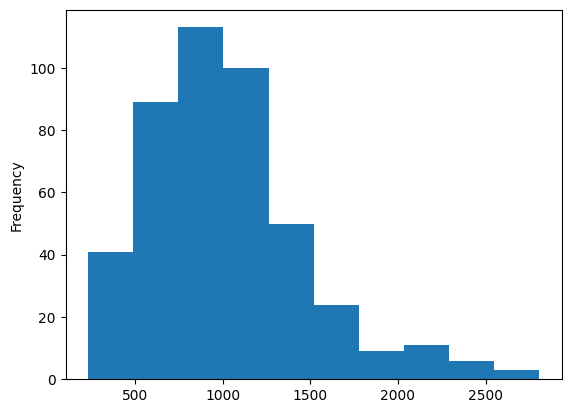

In [23]:
my_colombian_df["template"].str.len().plot.hist()

<Axes: >

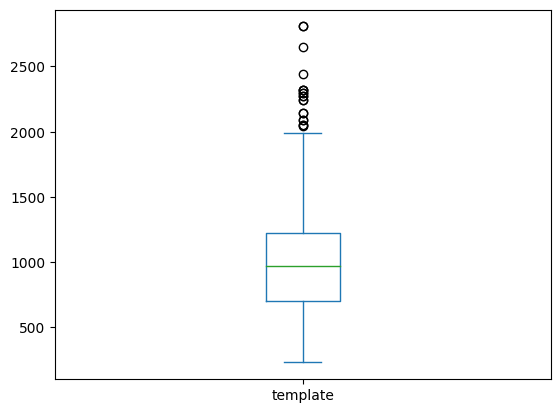

In [24]:
my_colombian_df["template"].str.len().plot.box()

In [119]:
clean_data = Path().cwd().parent/"Clean"
my_colombian_df["uuid"] = my_colombian_df.apply(lambda x: uuid4(), axis=1)
my_colombian_df[["uuid", "title","ingredients", "steps"]].to_csv(clean_data/"mycolombianrecipes.csv", index=False)

## Dataset Recetas

In [93]:
from ast import literal_eval
dataset = (DATASET/"recetas1").glob("**/*.csv")
df_recetas = pd.concat([pd.read_csv(file) for file in dataset])
df_recetas = df_recetas.drop_duplicates()
df_recetas = df_recetas[df_recetas.ingredientes.notna()]
df_recetas.ingredientes = df_recetas.ingredientes.apply(literal_eval)
df_recetas.order = df_recetas.order.apply(literal_eval)
df_recetas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18584 entries, 0 to 49
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         18584 non-null  object 
 1   intro         11250 non-null  object 
 2   order         18584 non-null  object 
 3   votes         13940 non-null  object 
 4   comensales    12339 non-null  object 
 5   duración      12337 non-null  object 
 6   para          10529 non-null  object 
 7   dificultad    13714 non-null  object 
 8   coste         0 non-null      float64
 9   types         12963 non-null  object 
 10  ingredientes  18584 non-null  object 
 11  url           18584 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.8+ MB


In [94]:
df_recetas.ingredientes = df_recetas.ingredientes.str.join(" ")
df_recetas.order = df_recetas.order.str.join(" ")

C:\Users\froro\AppData\Local\Temp\ipykernel_9612\3918826705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.steps = df.steps.str.replace("\n", " ")


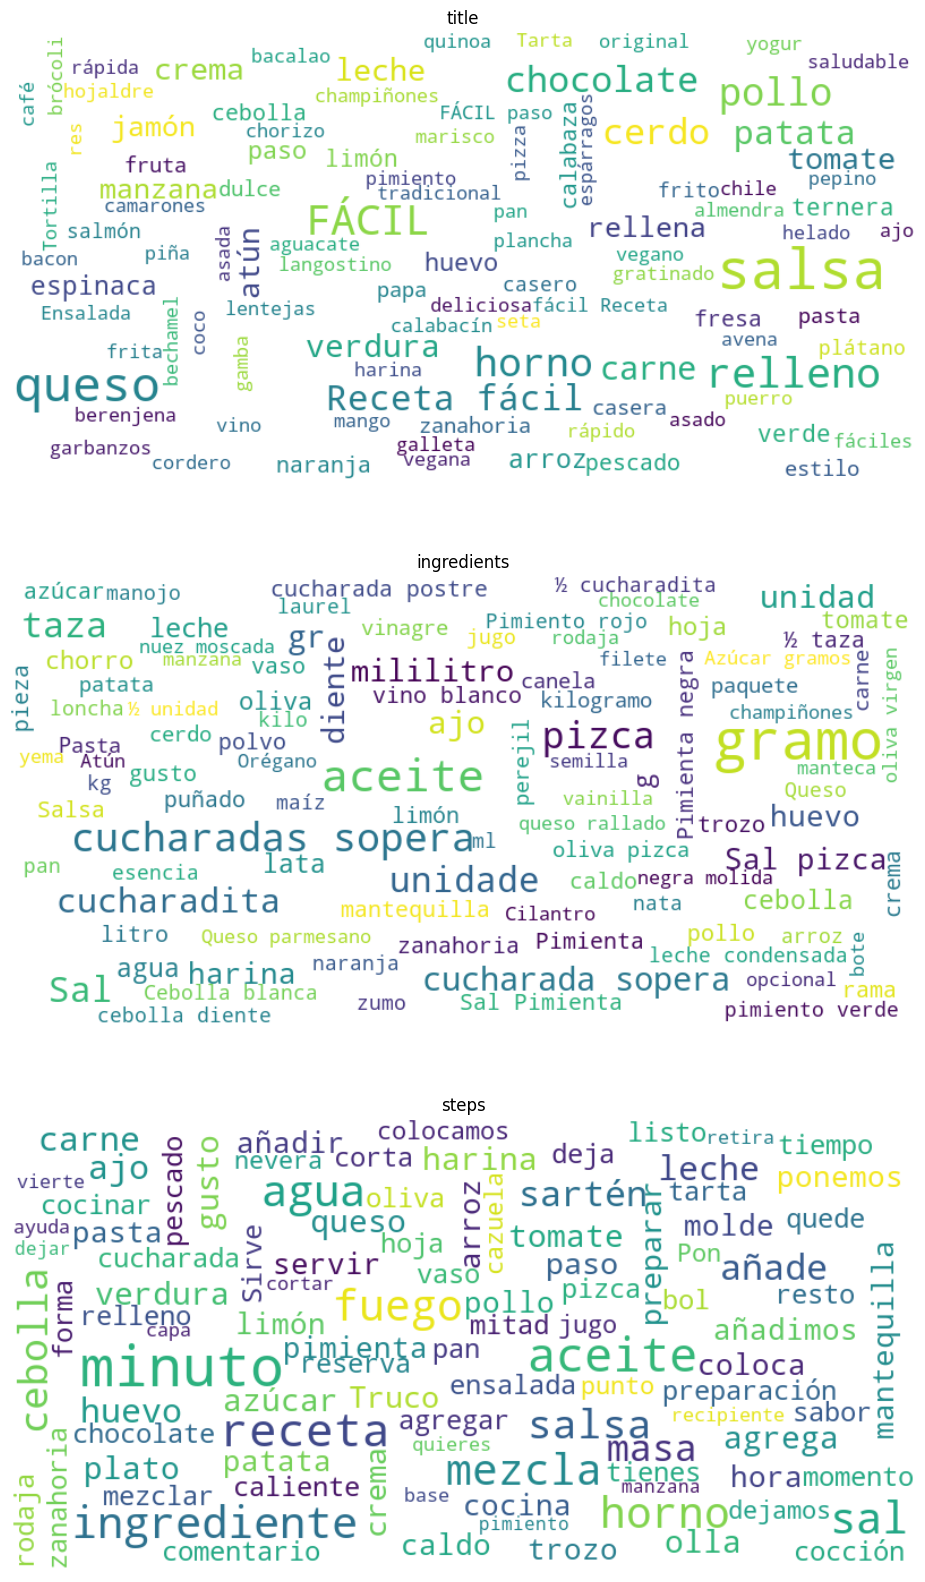

In [100]:
df = df_recetas[["title", "ingredientes", "order"]]
df.columns = ["title", "ingredients", "steps"]
df.steps = df.steps.str.replace("\n", " ")
df.utils_text.plot_word_cloud()

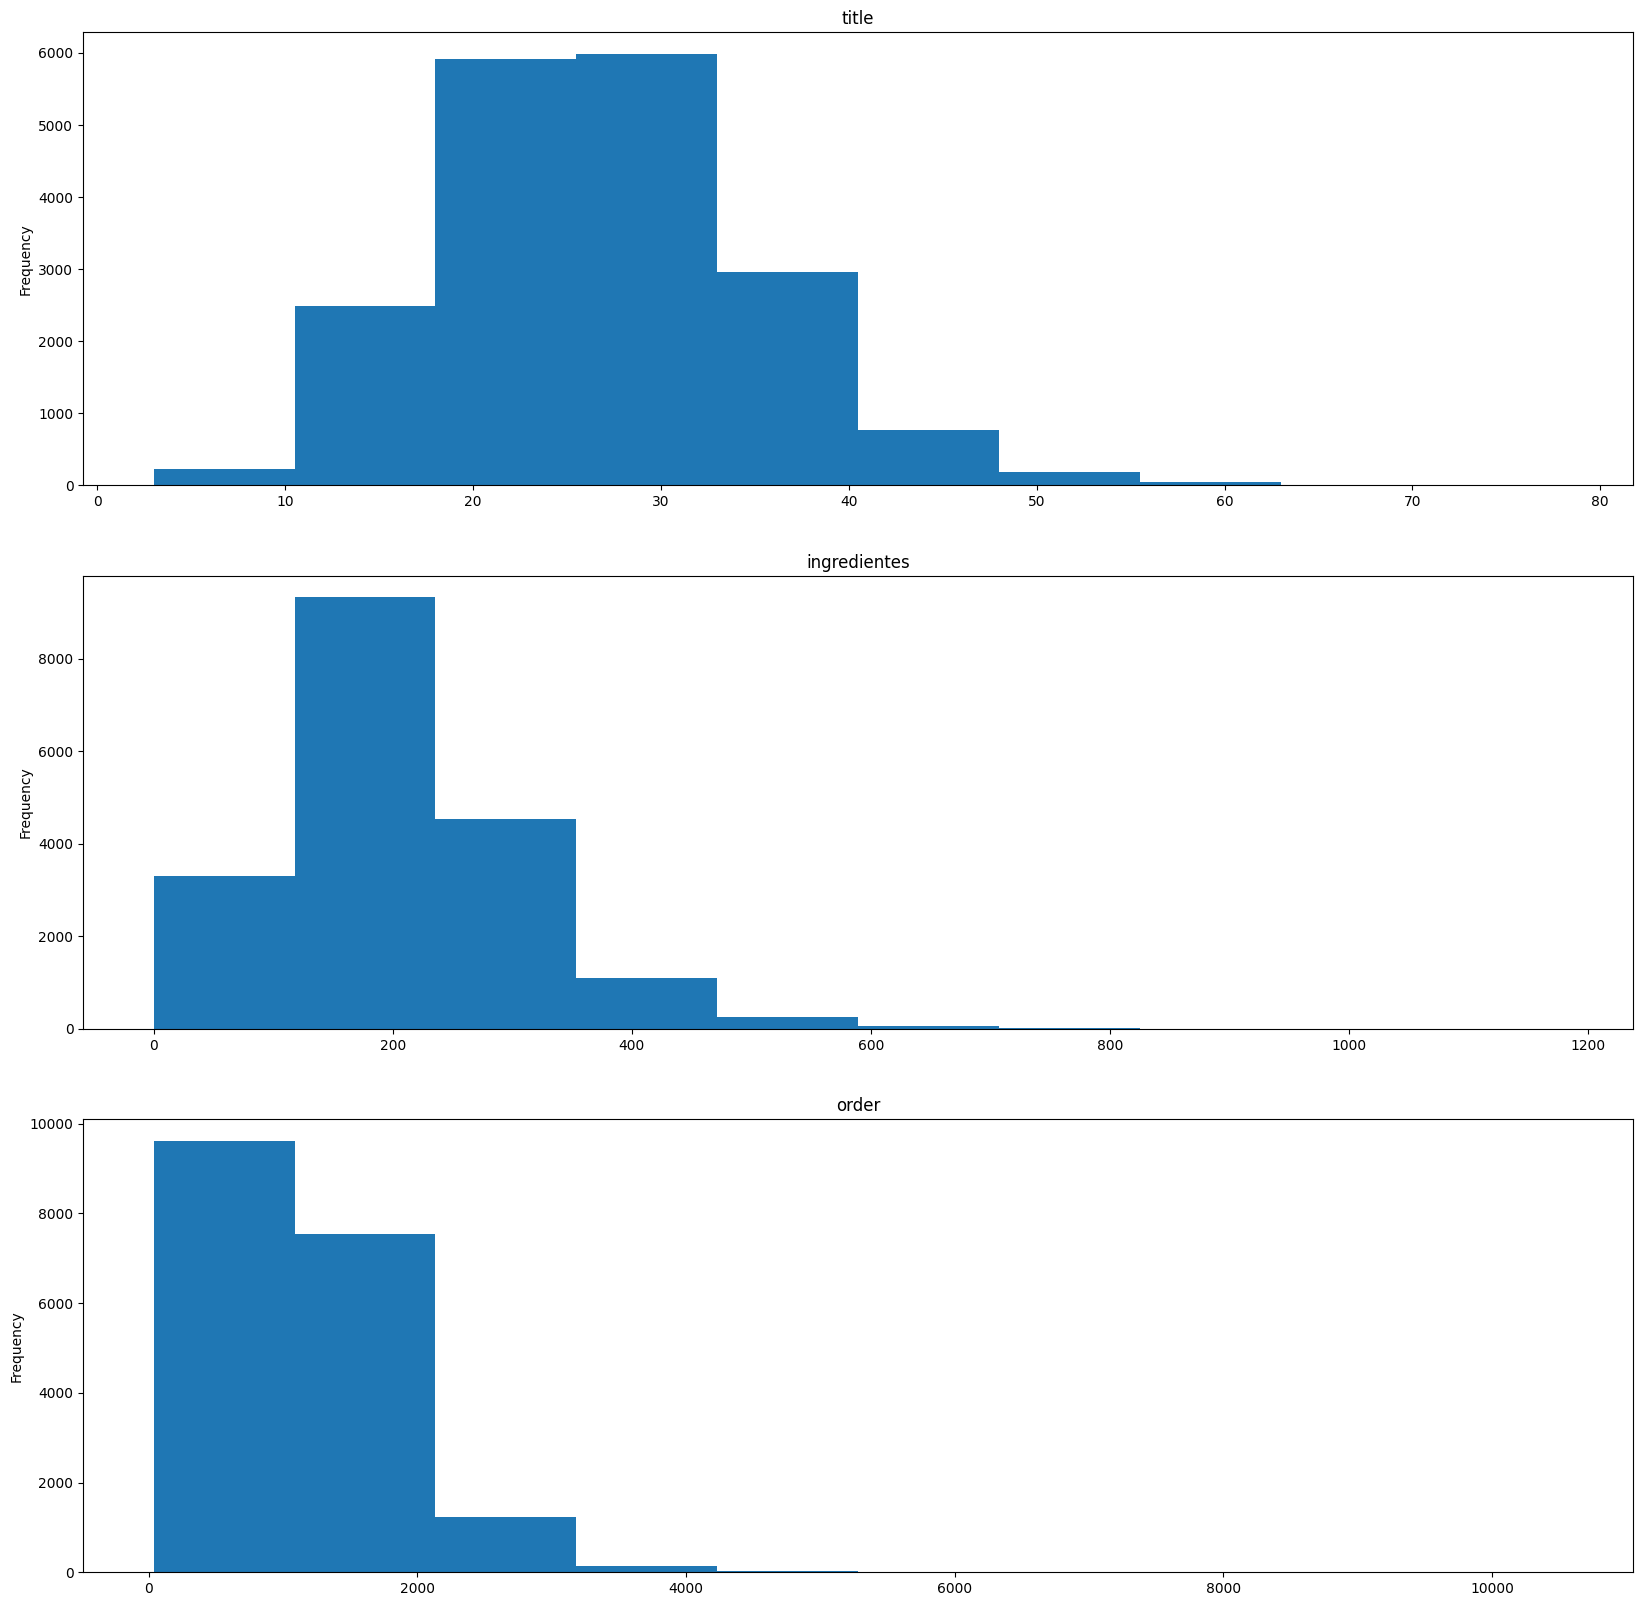

In [97]:
df.utils_text.plot_length_text()

C:\Users\froro\AppData\Local\Temp\ipykernel_9612\3899551759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["template"] = df.apply(lambda x: create_tamplate(x.title, x.ingredients, x.steps), axis=1)


<Axes: ylabel='Frequency'>

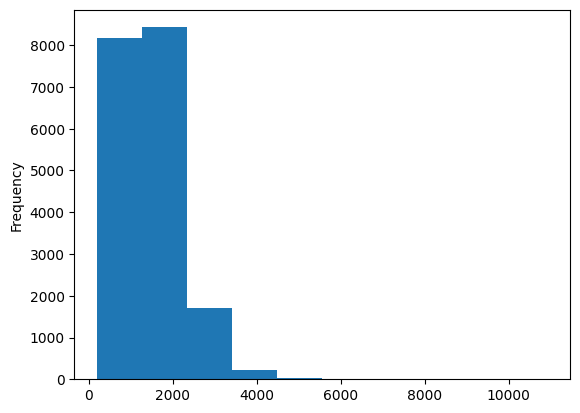

In [102]:
df["template"] = df.apply(lambda x: create_tamplate(x.title, x.ingredients, x.steps), axis=1)
df["template"].str.len().plot.hist()

In [103]:
df["template"].iloc[:10].apply(print)

nombre del plato: Empanadas de vacío y provolone
Dado que los ingredientes son:
1 kilogramo de vacío 2 pimientos 250 gramos de queso provolone 12 discos de empanadas 1 huevo para pintar
Hacer los siguientes pasos:
1 En primer lugar, cocinaremos la carne. En este caso, lo hicimos a la parrilla, pero puedes hacerla al horno o a la cacerola. Con cualquiera de los métodos que elijas, es importante que hagas una cocción lenta y que no se seque para que las empanadas queden jugosas. 2 También cocina los pimientos en la parrilla o envueltos en papel aluminio directo sobre las brasas. Una vez listos, retira las semillas y córtalos en cuadraditos. 3 Cuando la carne esté cocida, córtala en cubos pequeños. 4 Mezcla el vacío cortado a cuchillo, junto con el pimiento y el queso provolone cortado en cubos y deja enfriar la preparación. 5 Enciende el horno para precalentarlo a 200°C. También espolvorea una asadera con pan rallado. 6 A continuación, comienza a armar las empanadas de vacío y provolone 

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: template, dtype: object

In [116]:
df_save = df[["title", "steps", "ingredients"]]
df_save["uuid"] = df_save.apply(lambda x: uuid4(), axis=1)
df_save.to_csv(clean_data/"recetas1.csv", index=False)